<a href="https://colab.research.google.com/github/YehorSavchenko/Quantopian-Lectures/blob/master/4Introduction_to_Pandas/questions/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises: Introduction to pandas
By Christopher van Hoecke, Maxwell Margenot

## Lecture Link :
https://www.quantopian.com/lectures/introduction-to-pandas

### IMPORTANT NOTE:
This lecture corresponds to the Introduction to Pandas lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



----

In [1]:
# Useful Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

----

# Exercise 1
## a. Series
Given an array of data, please create a pandas Series `s` with a datetime index starting `2016-01-01`. The index should be daily frequency and should be the same length as the data.

In [3]:
pd.date_range?

In [4]:
l = np.random.randint(1,100, size=1000)
s = pd.Series(l)

## Your code goes here
s.index = pd.date_range('2016-01-01', periods=len(s), freq='D')
s.head(10)

2016-01-01    58
2016-01-02    78
2016-01-03     1
2016-01-04    37
2016-01-05    53
2016-01-06    50
2016-01-07    80
2016-01-08    10
2016-01-09    23
2016-01-10    60
Freq: D, dtype: int64

## b. Accessing Series Elements.
- Print every other element of the first 50 elements of series `s`.
- Find the value associated with the index `2017-02-20`.

In [5]:
## Your code goes here
s.iloc[:50]
## Your code goes here
s.loc['2017-02-20']

3

## c. Boolean Indexing.
In the series `s`, print all the values between 1 and 3.

In [9]:
## Your code goes here
s.loc[(s > 1) & (s < 3)]

2016-10-07    2
2017-04-18    2
2017-05-04    2
2017-09-18    2
2017-10-24    2
2018-02-04    2
2018-08-29    2
dtype: int64

----

#Exercise 2 : Indexing and time series.
###a. Display
Print the first and last 5 elements of the series `s`.

In [10]:
## Your code goes here
s.head(5)
## Your code goes here
s.tail(5)

2018-09-22    98
2018-09-23     4
2018-09-24    85
2018-09-25    20
2018-09-26    55
Freq: D, dtype: int64

### b. Resampling
- Using the resample method, upsample the daily data to monthly frequency. Use the median method so that each monthly value is the median price of all the days in that month.
- Take the daily data and fill in every day, including weekends and holidays, using forward-fills.

In [12]:
import yfinance as yf

In [14]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = yf.download(symbol, start=start, end=end).Open

## Your code goes here
prices.resample('M').median()

[*********************100%%**********************]  1 of 1 completed


Date
2012-01-31     7.1080
2012-02-29     7.5593
2012-03-31     8.1065
2012-04-30     8.3973
2012-05-31     8.1035
2012-06-30     8.0974
2012-07-31     7.5800
2012-08-31     5.9258
2012-09-30     6.6760
2012-10-31     5.7144
2012-11-30     5.2844
2012-12-31     5.5431
2013-01-31     5.9792
2013-02-28     6.2880
2013-03-31     6.4027
2013-04-30     6.8103
2013-05-31     7.3724
2013-06-30     7.2688
2013-07-31     7.7339
2013-08-31     8.0992
2013-09-30     8.3641
2013-10-31     8.8284
2013-11-30    10.7074
2013-12-31    10.4300
2014-01-31    10.6000
2014-02-28    11.0222
2014-03-31    11.6822
2014-04-30    10.8098
2014-05-31    10.1300
2014-06-30    11.7406
2014-07-31    12.0335
2014-08-31    13.5634
2014-09-30    13.2884
2014-10-31    12.9100
2014-11-30    13.1366
2014-12-31    13.1724
2015-01-31    14.2364
2015-02-28    13.4334
2015-03-31    13.3516
2015-04-30    13.1026
2015-05-31    12.6234
2015-06-30    12.1587
2015-07-31    13.1982
2015-08-31    14.8440
2015-09-30    14.5500
2015-

In [15]:
prices.asfreq?

In [16]:
## Your code goes here
prices.asfreq('D', method='ffill')

Date
2012-01-03    6.8740
2012-01-04    6.9200
2012-01-05    6.9376
2012-01-06    6.9776
2012-01-07    6.9776
               ...  
2015-12-27    9.9774
2015-12-28    9.9194
2015-12-29    9.8820
2015-12-30    9.8000
2015-12-31    9.6622
Freq: D, Name: Open, Length: 1459, dtype: float64

----

#Exercise 3 : Missing Data
- Replace all instances of `NaN` using the forward fill method.
- Instead of filling, remove all instances of `NaN` from the data.

In [18]:
## Your code goes here
prices.fillna(method='ffill')

<ipython-input-18-cf8f3b12e6be>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices.fillna(method='ffill')


Date
2012-01-03    6.8740
2012-01-04    6.9200
2012-01-05    6.9376
2012-01-06    6.9776
2012-01-09    6.9800
               ...  
2015-12-24    9.9774
2015-12-28    9.9194
2015-12-29    9.8820
2015-12-30    9.8000
2015-12-31    9.6622
Name: Open, Length: 1006, dtype: float64

In [19]:
## Your code goes here
prices.dropna()

Date
2012-01-03    6.8740
2012-01-04    6.9200
2012-01-05    6.9376
2012-01-06    6.9776
2012-01-09    6.9800
               ...  
2015-12-24    9.9774
2015-12-28    9.9194
2015-12-29    9.8820
2015-12-30    9.8000
2015-12-31    9.6622
Name: Open, Length: 1006, dtype: float64

----

# Exercise 4 : Time Series Analysis with pandas
## a. General Information
Print the count, mean, standard deviation, minimum, 25th, 50th, and 75th percentiles, and the max of our series s.

In [20]:
print ("Summary Statistics")
## Your code goes here
s.describe()

Summary Statistics


count    1000.000000
mean       49.426000
std        28.075982
min         1.000000
25%        25.000000
50%        49.000000
75%        73.000000
max        99.000000
dtype: float64

## b. Series Operations
- Get the additive and multiplicative returns of this series.
- Calculate the rolling mean with a 60 day window.
- Calculate the standard deviation with a 60 day window.

Object `data.pct_change` not found.


In [44]:
data = yf.download('GE', start='2016-01-01', end='2017-01-01').Open

## Your code goes here
additive_returns = data.diff()[1:]
print(additive_returns.head())
## Your code goes here
multiplicative_returns = data.pct_change()[1:]
print(multiplicative_returns.head())

[*********************100%%**********************]  1 of 1 completed

Date
2016-01-05    0.623016
2016-01-06   -1.964905
2016-01-07   -2.971313
2016-01-08   -2.156586
2016-01-11   -3.163010
Name: Open, dtype: float64
Date
2016-01-05    0.004255
2016-01-06   -0.013364
2016-01-07   -0.020482
2016-01-08   -0.015177
2016-01-11   -0.022603
Name: Open, dtype: float64


In [29]:
data.pct_change?

In [45]:
# Rolling mean

## Your code goes here
rolling_mean = data.rolling(window=60).mean()
print(rolling_mean.head())
## Your code goes here

Date
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
Name: Open, dtype: float64


In [46]:
# Rolling Standard Deviation

## Your code goes here
rolling_std = data.rolling(window=60).std()
print(rolling_std.head())
## Your code goes here

Date
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
Name: Open, dtype: float64


----

# Exercise 5 : DataFrames
## a. Indexing
Form a DataFrame out of `dict_data` with `l` as its index.

In [50]:
l = ['fifth','fourth', 'third', 'second', 'first']
dict_data = {'a' : [1, 2, 3, 4, 5], 'b' : ['L', 'K', 'J', 'M', 'Z'],'c' : np.random.normal(0, 1, 5)}

## Your code goes here
df = pd.DataFrame(dict_data, index=l)
df

,a,b,c
fifth,1,L,-0.764197
fourth,2,K,1.060298
third,3,J,1.742148
second,4,M,0.244358
first,5,Z,0.417323


## b. DataFrames Manipulation
- Concatenate the following two series to form a dataframe.
- Rename the columns to `Good Numbers` and `Bad Numbers`.
- Change the index to be a datetime index starting on `2016-01-01`.

In [52]:
s1 = pd.Series([2, 3, 5, 7, 11, 13], name='prime')
s2 = pd.Series([1, 4, 6, 8, 9, 10], name='other')

## Your code goes here
s3 = pd.concat([s1, s2], axis=1)
## Your code goes here
s3.columns = ['Good Numbers', 'Bad Numbers']
## Your code goes here
s3.index = pd.date_range('2016-01-01', periods=len(s3), freq='D')
print(s3)

            Good Numbers  Bad Numbers
2016-01-01             2            1
2016-01-02             3            4
2016-01-03             5            6
2016-01-04             7            8
2016-01-05            11            9
2016-01-06            13           10


----

# Exercise 6 : Accessing DataFrame elements.
## a. Columns
- Check the data type of one of the DataFrame's columns.
- Print the values associated with time range `2013-01-01` to `2013-01-10`.

In [54]:
symbol = ["XOM", "BP", "COP", "TOT"]
start = "2012-01-01"
end = "2016-01-01"
prices = yf.download(symbol, start=start, end=end).Open
if isinstance(symbol, list):
    prices.columns = prices.columns
else:
    prices.name = symbol

# Check Type of Data for these two.
prices.XOM.head()
prices.loc[:, 'XOM'].head()

[*********************100%%**********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TOT']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Date
2012-01-03    85.970001
2012-01-04    85.790001
2012-01-05    85.639999
2012-01-06    85.919998
2012-01-09    85.000000
Name: XOM, dtype: float64

In [57]:
## Your code goes here
print(type(prices.XOM))
## Your code goes here
print(prices.loc['2013-01-01':'2013-01-10'])

<class 'pandas.core.series.Series'>
Ticker             BP        COP  TOT        XOM
Date                                            
2013-01-02  42.450001  59.150002  NaN  87.790001
2013-01-03  42.419998  59.139999  NaN  88.459999
2013-01-04  43.430000  59.290001  NaN  88.500000
2013-01-07  43.369999  59.630001  NaN  88.309998
2013-01-08  43.310001  58.990002  NaN  87.820000
2013-01-09  43.730000  58.590000  NaN  88.400002
2013-01-10  44.470001  58.529999  NaN  88.750000


In [ ]:
## Your code goes here

----

# Exercise 7 : Boolean Indexing
## a. Filtering.
- Filter pricing data from the last question (stored in `prices`) to only print values where:
    - BP > 30
    - XOM < 100
    - The intersection of both above conditions (BP > 30 **and** XOM < 100)
    - The union of the previous composite condition along with TOT having no `nan` values ((BP > 30 **and** XOM < 100) **or** TOT is non-`NaN`).
- Add a column for TSLA and drop the column for XOM.

In [58]:
# Filter the data for prices to only print out values where
# BP > 30
print(prices.loc[prices.BP > 30])
# XOM < 100
print(prices.loc[prices.XOM < 100])
# BP > 30 AND XOM < 100
print(prices.loc[(prices.BP > 30) & (prices.XOM < 100)])
# The union of (BP > 30 AND XOM < 100) with TOT being non-nan
print(prices.loc[((prices.BP > 30) & (prices.XOM < 100)) | (prices.TOT.notna())])
## Your code goes here

Ticker             BP        COP  TOT        XOM
Date                                            
2012-01-03  43.790001  56.350441  NaN  85.970001
2012-01-04  44.470001  56.335194  NaN  85.790001
2012-01-05  44.250000  55.847309  NaN  85.639999
2012-01-06  44.580002  55.999775  NaN  85.919998
2012-01-09  44.020000  55.466152  NaN  85.000000
...               ...        ...  ...        ...
2015-12-24  32.509998  49.040001  NaN  80.269997
2015-12-28  31.670000  47.610001  NaN  78.120003
2015-12-29  31.969999  48.230000  NaN  79.989998
2015-12-30  31.549999  46.939999  NaN  78.320000
2015-12-31  31.250000  46.060001  NaN  77.510002

[1003 rows x 4 columns]
Ticker             BP        COP  TOT        XOM
Date                                            
2012-01-03  43.790001  56.350441  NaN  85.970001
2012-01-04  44.470001  56.335194  NaN  85.790001
2012-01-05  44.250000  55.847309  NaN  85.639999
2012-01-06  44.580002  55.999775  NaN  85.919998
2012-01-09  44.020000  55.466152  NaN  85.00

In [61]:
# Add a column for TSLA and drop the column for XOM
prices.loc[:, 'TSLA'] = yf.download('TSLA', start=start, end=end).Open
prices = prices.drop('XOM', axis=1)
## Your code goes here


[*********************100%%**********************]  1 of 1 completed


KeyError: "['XOM'] not found in axis"

In [62]:
prices.head()

Ticker,BP,COP,TOT,TSLA
Date,,,,
2012-01-03,43.790001,56.350441,NaN,1.929333
2012-01-04,44.470001,56.335194,NaN,1.880667
2012-01-05,44.250000,55.847309,NaN,1.850667
2012-01-06,44.580002,55.999775,NaN,1.813333
2012-01-09,44.020000,55.466152,NaN,1.800000


## b. DataFrame Manipulation (again)
- Concatenate these DataFrames.
- Fill the missing data with 0s

In [67]:
# Concatenate these dataframes
df_1 = yf.download(['SPY', 'VXX'], start=start, end=end).Open
df_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=start, end=end).Open

## Your code goes here
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.fillna(0)

[*********************100%%**********************]  2 of 2 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VXX']: YFChartError("%ticker%: Data doesn't exist for startDate = 1325394000, endDate = 1451624400")
[*********************100%%**********************]  3 of 3 completed


Ticker,SPY,VXX,AAPL,GOOG,MSFT
Date,,,,,
2012-01-03,127.760002,0.0,14.621429,16.262545,26.549999
2012-01-04,127.199997,0.0,14.642857,16.563665,26.820000
2012-01-05,127.010002,0.0,14.819643,16.491436,27.379999
2012-01-06,128.199997,0.0,14.991786,16.417213,27.530001
2012-01-09,128.000000,0.0,15.196429,16.102144,28.049999
...,...,...,...,...,...
2015-12-24,205.720001,0.0,27.250000,37.477501,55.860001
2015-12-28,204.860001,0.0,26.897499,37.646000,55.349998
2015-12-29,206.509995,0.0,26.740000,38.334499,56.290001


In [ ]:
# Fill GOOG missing data with 0

## Your code goes here

----

# Exercise 8 : Time Series Analysis
## a. Summary
- Print out a summary of the `prices` DataFrame from above.
- Take the log returns and print the first 10 values.
- Print the multiplicative returns of each company.
- Normalize and plot the returns from 2014 to 2015.
- Plot a 60 day window rolling mean of the prices.
- Plot a 60 day window rolling standfard deviation of the prices.

In [68]:
# Print a summary of the 'prices' times series.
## Your code goes here
prices.describe()

Ticker,BP,COP,TOT,TSLA
count,1006.000000,1006.000000,0.0,1006.000000
mean,42.462952,63.267325,NaN,9.829824
std,4.723451,9.170772,NaN,5.978610
min,29.690001,41.980000,NaN,1.774667
25%,40.442499,56.452499,NaN,2.333667
50%,42.110001,62.199999,NaN,11.834667
75%,45.817500,69.287498,NaN,15.177000
max,53.450001,86.680000,NaN,19.177999


In [69]:
# Print the natural log returns of the first 10 values
## Your code goes here
np.log(prices).head(10)

Ticker,BP,COP,TOT,TSLA
Date,,,,
2012-01-03,3.779406,4.031590,NaN,0.657174
2012-01-04,3.794815,4.031319,NaN,0.631626
2012-01-05,3.789855,4.022621,NaN,0.615546
2012-01-06,3.797285,4.025348,NaN,0.595167
2012-01-09,3.784644,4.015773,NaN,0.587787
2012-01-10,3.800421,4.026572,NaN,0.603951
2012-01-11,3.777806,4.017421,NaN,0.610490
2012-01-12,3.782142,3.997605,NaN,0.641152
2012-01-13,3.772301,3.982658,NaN,0.638339


In [71]:
# Print the Muliplicative returns
## Your code goes here
print(prices.pct_change()[1:])

Ticker            BP       COP  TOT      TSLA
Date                                         
2012-01-04  0.015529 -0.000271  NaN -0.025224
2012-01-05 -0.004947 -0.008660  NaN -0.015952
2012-01-06  0.007458  0.002730  NaN -0.020173
2012-01-09 -0.012562 -0.009529  NaN -0.007353
2012-01-10  0.015902  0.010858  NaN  0.016296
...              ...       ...  ...       ...
2015-12-24  0.015937  0.037006  NaN -0.006977
2015-12-28 -0.025838 -0.029160  NaN  0.004034
2015-12-29  0.009473  0.013022  NaN -0.006177
2015-12-30 -0.013137 -0.026747  NaN  0.028427
2015-12-31 -0.009509 -0.018747  NaN  0.008073

[1005 rows x 4 columns]


<ipython-input-71-7215067724e0>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  print(prices.pct_change()[1:])


TypeError: NDFrame.head() got an unexpected keyword argument 'axis'

<ipython-input-73-3a5bc30e785a>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mult_return = prices.pct_change()[1:]


<Axes: xlabel='Date'>

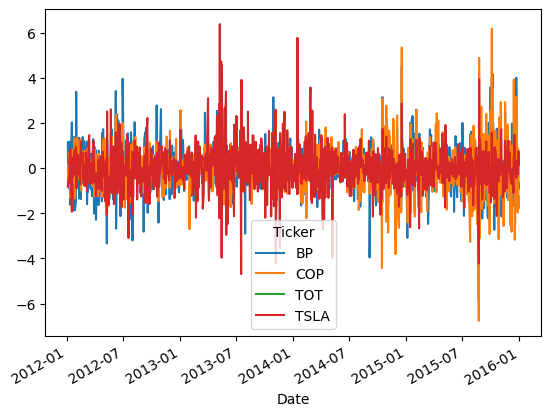

In [73]:
# Normlalize the returns and plot
## Your code goes here
mult_return = prices.pct_change()[1:]
mult_returns = (mult_return - mult_return.mean(axis=0))/mult_return.std(axis=0)
mult_returns.plot()

<Axes: xlabel='Date'>

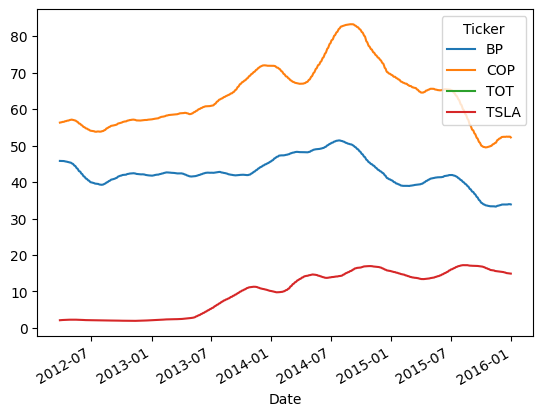

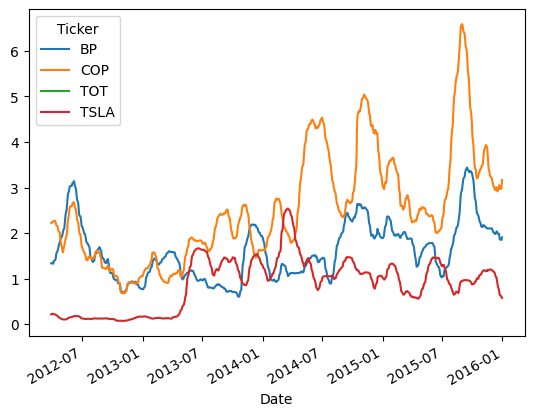

In [75]:
# Rolling mean
## Your code goes here
rolling_mean = prices.rolling(window=60).mean()
rolling_mean.plot()

# Rolling standard deviation
## Your code goes here
rolling_std = prices.rolling(window=60).std()
rolling_std.plot()
# Plotting
## Your code goes here

---

Congratulations on completing the Introduction to pandas exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) Tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*